<a href="https://colab.research.google.com/github/LIZZETHGOMEZ/Data-Sciene-BEDU-Santander-2021/blob/main/Analisis%20de%20Datos%20con%20Python/Sesion_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sesión 8: Intro a Machine Learning


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## K-Medias

In [10]:
# Cargamos datos
df = pd.read_csv("/content/drive/MyDrive/datasets_BEDU/Remoto crimenes_locacion.csv")
df.head()

,codigo_crimen,latitud,longitud
0,8,-15.068712,0.157991
1,0,-4.065913,12.491768
2,1,3.141179,-12.090601
3,8,8.806998,14.316892
4,3,-5.773641,15.487286


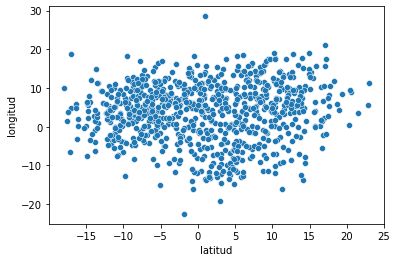

In [11]:
# Observemos nuestros datos
sns.scatterplot(x = df['latitud'], y = df['longitud']);

In [12]:
# Cargo biblioteca
from sklearn.cluster import KMeans

In [13]:
# Quiero clasificar en 6 grupos k = 6
k_means = KMeans(n_clusters = 6, max_iter = 10_000) #Iniciamos con 10 mil iteraciones
k_means.fit(df[['latitud', 'longitud']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Observemos los centroides
centers = k_means.clusters_centers

### Matriz de Confusión

In [14]:
from sklearn import metrics

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
# Grafcamos
fig, ax = plt.subplots(figsize = (6,6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot_kws = {'size' = 20}, fmt = 'g', cmap = 'Blues', cbar = False)
plt.xlabel('Estimado por modelo', fontsize = 15)
plt.ylabel('Realidad', fontsize = 15)

In [ ]:
# Observemos las metricas para conporbar las significancia del modelo
print(metrics.precision_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

In [ ]:
# Para especificidad lo hacemos a mano
tn, fp, fn, tp = cnf_matrix.ravel()
print(tn/(tn + fp))